In [ ]:
!pip install yfinance



     |████████████████████████████████| 6.4 MB 29.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2022-07-14 at 18:38:30


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

In [4]:
import pandas as pd
import altair as alt
pd.__version__

'1.1.3'

## Combine Table

In [37]:
start = datetime.datetime(2016, 12, 29) # START ON January 1 2018
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['KO','PEP']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
KO_PEP_stocks = pd.concat(df_map,axis = 1,keys = tickers)
KO_PEP_stocks.tail()

KO                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2022-07-11  62.990002  63.459999  62.590000  62.939999  62.939999  12702100   
2022-07-12  63.000000  63.450001  62.470001  62.669998  62.669998  14731100   
2022-07-13  62.330002  63.000000  61.980000  62.380001  62.380001  13145300   
2022-07-14  61.330002  62.250000  61.299999  62.180000  62.180000  14433000   
2022-07-15  62.750000  62.970001  62.070000  62.500000  62.500000  21963200   

                   PEP                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-07-11  171.410004  172.800003  170.020004  170.470001  170.470001   
2022-07-12  173.000000  173.320007  168.869995  169.500000  169.500000   
2022-07-13  168.539993  171.440002  167.979996  170.100006  170.100006   
2022-07-14  168.289993  171.160004  167.699997  170.979996  170.979996   
2022-07-15  171.339996  172.919998  170.020004  171.119995  171.119995   

                     
             Volume  
Date                 
2022-07-11  4921300  
2022-07-12  5201600  
2022-07-13  4533100  
2022-07-14  4218300  
2022-07-15  4656000

In [45]:
KO_PEP = pd.DataFrame(KO_PEP_stocks) #KO_PEP_stocks dataframe
for tick in tickers:
    KO_PEP[tick+' Return'] = KO_PEP_stocks[tick]['Close'].pct_change()
KO_PEP.head()

KO                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2016-12-29  41.380001  41.689999  41.380001  41.599998  34.824364   6875300   
2016-12-30  41.689999  41.840000  41.349998  41.459999  34.707172  11470200   
2017-01-03  41.500000  41.810001  41.279999  41.799999  34.991787  14711000   
2017-01-04  41.880001  41.970001  41.590000  41.650002  34.866219   9959400   
2017-01-05  41.660000  41.860001  41.529999  41.750000  34.949932   8968300   

                   PEP                                                 \
                  Open        High         Low       Close  Adj Close   
Date                                                                    
2016-12-29  104.500000  105.099998  104.480003  104.989998  89.422745   
2016-12-30  104.709999  105.150002  104.330002  104.629997  89.116104   
2017-01-03  104.940002  105.089996  104.209999  104.650002  89.133163   
2017-01-04  105.110001  105.629997  104.790001  104.849998  89.303497   
2017-01-05  104.519997  105.120003  104.190002  104.709999  89.184258   

                    KO Return PEP Return  
             Volume                       
Date                                      
2016-12-29  2438100       NaN        NaN  
2016-12-30  3484000 -0.003365  -0.003429  
2017-01-03  3741200  0.008201   0.000191  
2017-01-04  3029700 -0.003588   0.001911  
2017-01-05  5087200  0.002401  -0.001335

In [46]:
KO_PEP.columns = ['KO_Open','KO_High','KO_Low','KO_Close','KO_AdjClose','KO_Volume',
                  'PEP_Open','PEP_High','PEP_Low','PEP_Close','PEP_AdjClose','PEP_Volume', 'KO_Return', 'PEP_Return']

KO_PEP.head()

,KO_Open,KO_High,KO_Low,KO_Close,KO_AdjClose,KO_Volume,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_AdjClose,PEP_Volume,KO_Return,PEP_Return
Date,,,,,,,,,,,,,,
2016-12-29,41.380001,41.689999,41.380001,41.599998,34.824364,6875300,104.500000,105.099998,104.480003,104.989998,89.422745,2438100,NaN,NaN
2016-12-30,41.689999,41.840000,41.349998,41.459999,34.707172,11470200,104.709999,105.150002,104.330002,104.629997,89.116104,3484000,-0.003365,-0.003429
2017-01-03,41.500000,41.810001,41.279999,41.799999,34.991787,14711000,104.940002,105.089996,104.209999,104.650002,89.133163,3741200,0.008201,0.000191
2017-01-04,41.880001,41.970001,41.590000,41.650002,34.866219,9959400,105.110001,105.629997,104.790001,104.849998,89.303497,3029700,-0.003588,0.001911
2017-01-05,41.660000,41.860001,41.529999,41.750000,34.949932,8968300,104.519997,105.120003,104.190002,104.709999,89.184258,5087200,0.002401,-0.001335


In [18]:
combined_stocks = pd.concat(df_map,axis = 0,keys = tickers)
combined_stocks.tail()

Open        High         Low       Close   Adj Close  \
    Date                                                                     
PEP 2022-07-07  169.520004  171.039993  169.380005  170.360001  170.360001   
    2022-07-08  170.570007  172.699997  170.550003  171.880005  171.880005   
    2022-07-11  171.410004  172.800003  170.020004  170.470001  170.470001   
    2022-07-12  173.000000  173.320007  168.869995  169.500000  169.500000   
    2022-07-13  168.539993  171.440002  167.979996  170.100006  170.100006   

                 Volume  
    Date                 
PEP 2022-07-07  5150200  
    2022-07-08  3482900  
    2022-07-11  4921300  
    2022-07-12  5201600  
    2022-07-13  4533100

## JUST COKE

In [8]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2018
end = datetime.date.today() # LOOK AT STOCKS TILL current date

ticker_coke = ['KO']
df_map = {}

for tick in ticker_coke:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed


In [10]:
tech_stock_COKE = pd.concat(df_map,axis = 0,keys = ticker_coke)
tech_stock_COKE.head()

Open       High        Low      Close  Adj Close    Volume
   Date                                                                       
KO 2017-01-03  41.500000  41.810001  41.279999  41.799999  34.991795  14711000
   2017-01-04  41.880001  41.970001  41.590000  41.650002  34.866222   9959400
   2017-01-05  41.660000  41.860001  41.529999  41.750000  34.949940   8968300
   2017-01-06  41.700001  41.810001  41.540001  41.740002  34.941559  10246600
   2017-01-09  41.230000  41.580002  41.209999  41.320000  34.589973  14822500

## JUST PEPSI

In [11]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2018
end = datetime.date.today() # LOOK AT STOCKS TILL current date

ticker_PEPSI = ['PEP']
df_map = {}

for tick in ticker_PEPSI:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed


In [12]:
tech_stock_PEPSI = pd.concat(df_map,axis = 0,keys = ticker_PEPSI)
tech_stock_PEPSI.head()

Open        High         Low       Close  Adj Close  \
    Date                                                                    
PEP 2017-01-03  104.940002  105.089996  104.209999  104.650002  89.133156   
    2017-01-04  105.110001  105.629997  104.790001  104.849998  89.303505   
    2017-01-05  104.519997  105.120003  104.190002  104.709999  89.184280   
    2017-01-06  104.980003  105.160004  104.120003  104.559998  89.056488   
    2017-01-09  104.160004  104.260002  103.250000  103.459999  88.119614   

                 Volume  
    Date                 
PEP 2017-01-03  3741200  
    2017-01-04  3029700  
    2017-01-05  5087200  
    2017-01-06  4109700  
    2017-01-09  5603500

In [19]:
tech_stocks.to_csv('combined_stocks.csv')
tech_stock_COKE.to_csv('tech_stock_COKE.csv')
tech_stock_PEPSI.to_csv('tech_stock_PEPSI.csv')

In [23]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

In [24]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2019
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['KO','PEP']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker         KO                                                        \
Stock Info         Open       High        Low      Close  Adj Close    Volume   
Date                                                                            
2022-07-11    62.990002  63.459999  62.590000  62.939999  62.939999  12702100   
2022-07-12    63.000000  63.450001  62.470001  62.669998  62.669998  14731100   
2022-07-13    62.330002  63.000000  61.980000  62.380001  62.380001  13145300   
2022-07-14    61.330002  62.250000  61.299999  62.180000  62.180000  14433000   
2022-07-15    62.750000  62.970001  62.070000  62.500000  62.500000  21963200   

Stock Ticker         PEP                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2022-07-11    171.410004  172.800003  170.020004  170.470001  170.470001   
2022-07-12    173.000000  173.320007  168.869995  169.500000  169.500000   
2022-07-13    168.539993  171.440002  167.979996  170.100006  170.100006   
2022-07-14    168.289993  171.160004  167.699997  170.979996  170.979996   
2022-07-15    171.339996  172.919998  170.020004  171.119995  171.119995   

Stock Ticker           
Stock Info     Volume  
Date                   
2022-07-11    4921300  
2022-07-12    5201600  
2022-07-13    4533100  
2022-07-14    4218300  
2022-07-15    4656000

In [26]:
tech_stocks.tail()

Stock Ticker         KO                                                        \
Stock Info         Open       High        Low      Close  Adj Close    Volume   
Date                                                                            
2022-07-11    62.990002  63.459999  62.590000  62.939999  62.939999  12702100   
2022-07-12    63.000000  63.450001  62.470001  62.669998  62.669998  14731100   
2022-07-13    62.330002  63.000000  61.980000  62.380001  62.380001  13145300   
2022-07-14    61.330002  62.250000  61.299999  62.180000  62.180000  14433000   
2022-07-15    62.750000  62.970001  62.070000  62.500000  62.500000  21963200   

Stock Ticker         PEP                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2022-07-11    171.410004  172.800003  170.020004  170.470001  170.470001   
2022-07-12    173.000000  173.320007  168.869995  169.500000  169.500000   
2022-07-13    168.539993  171.440002  167.979996  170.100006  170.100006   
2022-07-14    168.289993  171.160004  167.699997  170.979996  170.979996   
2022-07-15    171.339996  172.919998  170.020004  171.119995  171.119995   

Stock Ticker           
Stock Info     Volume  
Date                   
2022-07-11    4921300  
2022-07-12    5201600  
2022-07-13    4533100  
2022-07-14    4218300  
2022-07-15    4656000

In [27]:
returns = pd.DataFrame(tech_stocks) #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.head()

Stock Ticker         KO                                                        \
Stock Info         Open       High        Low      Close  Adj Close    Volume   
Date                                                                            
2017-01-03    41.500000  41.810001  41.279999  41.799999  34.991791  14711000   
2017-01-04    41.880001  41.970001  41.590000  41.650002  34.866230   9959400   
2017-01-05    41.660000  41.860001  41.529999  41.750000  34.949932   8968300   
2017-01-06    41.700001  41.810001  41.540001  41.740002  34.941566  10246600   
2017-01-09    41.230000  41.580002  41.209999  41.320000  34.589966  14822500   

Stock Ticker         PEP                                                 \
Stock Info          Open        High         Low       Close  Adj Close   
Date                                                                      
2017-01-03    104.940002  105.089996  104.209999  104.650002  89.133148   
2017-01-04    105.110001  105.629997  104.790001  104.849998  89.303490   
2017-01-05    104.519997  105.120003  104.190002  104.709999  89.184250   
2017-01-06    104.980003  105.160004  104.120003  104.559998  89.056496   
2017-01-09    104.160004  104.260002  103.250000  103.459999  88.119614   

Stock Ticker          KO Return PEP Return  
Stock Info     Volume                       
Date                                        
2017-01-03    3741200       NaN        NaN  
2017-01-04    3029700 -0.003588   0.001911  
2017-01-05    5087200  0.002401  -0.001335  
2017-01-06    4109700 -0.000239  -0.001433  
2017-01-09    5603500 -0.010062  -0.010520

## What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

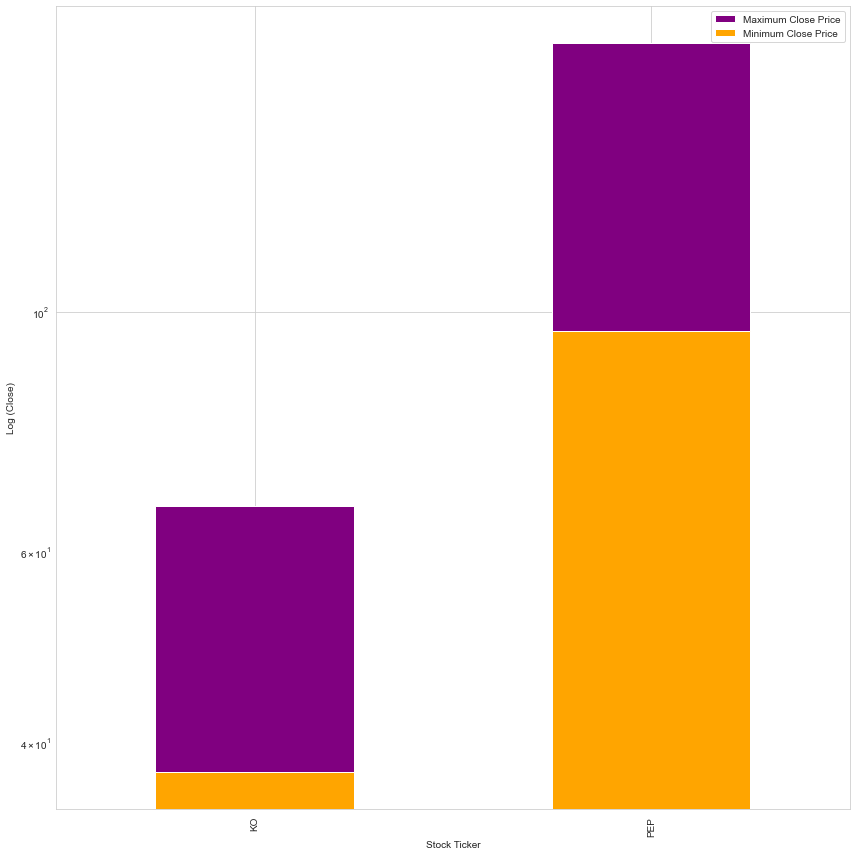

In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

# Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks.

## Reliable stocks are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: KO and PEP. Volatile stocks are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: AMZN (More volatile stocks imply a greater degree of risk and potential losses)

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Today')

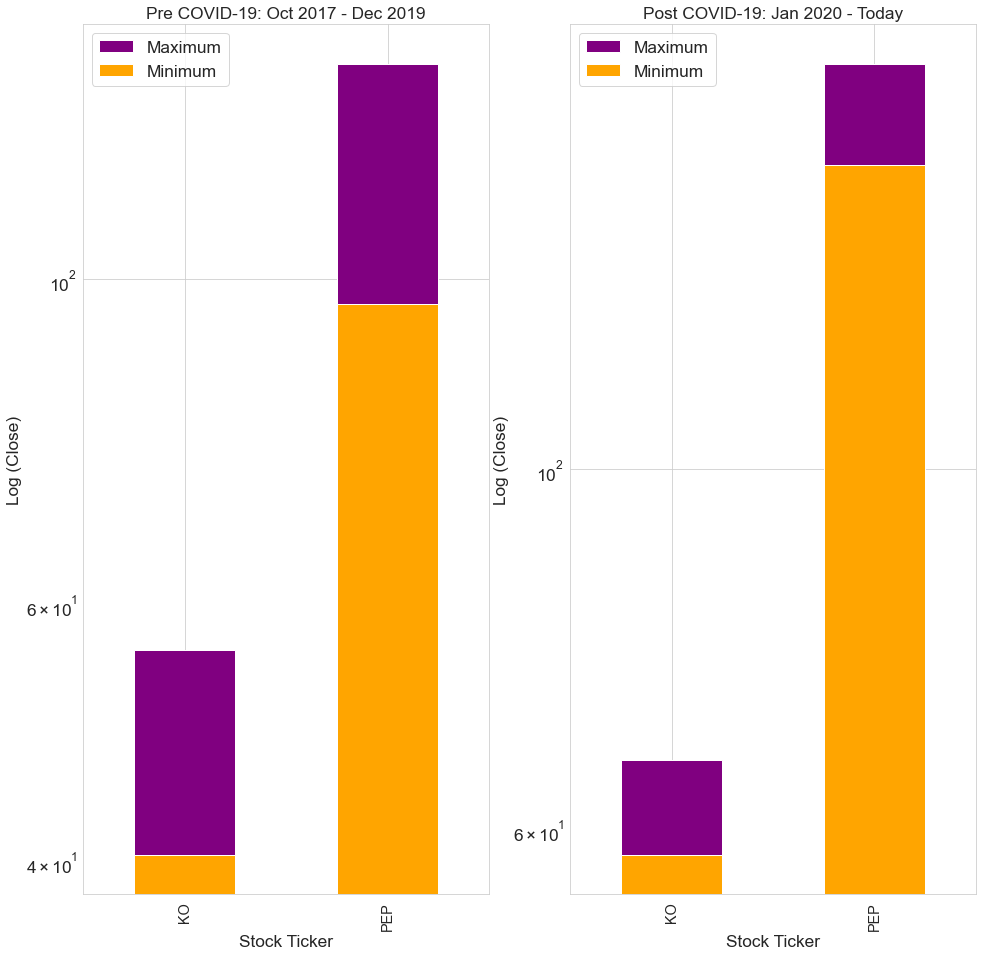

In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2017-01-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2017-01-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Oct 2017 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':current_date_str].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2022-01-01':current_date_str].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Today')

### The next analysis is to use pandas pct_change() method on the Close column to create a Returns value. 

#### A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.



In [8]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.head()

,KO Return,PEP Return
Date,,
2017-01-03,NaN,NaN
2017-01-04,-0.003588,0.001911
2017-01-05,0.002401,-0.001335
2017-01-06,-0.000239,-0.001433
2017-01-09,-0.010062,-0.010520


In [9]:
#A looks at the minimum and maximum returns for each stock tick in this time-period: 
returns.idxmin()

KO Return    2020-03-12
PEP Return   2020-03-20
dtype: datetime64[ns]

In [10]:
returns.idxmax()

KO Return    2020-04-06
PEP Return   2020-03-17
dtype: datetime64[ns]